# **Data Cleaning**

**Missing value imputation by Mean, Median**

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
dataset_path = "/content/test.csv"
df = pd.read_csv(dataset_path)

In [30]:
df = pd.read_csv("/content/train.csv")

In [31]:
df.shape

(891, 12)

In [32]:
df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [33]:
df.tail(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


In [34]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [35]:
missing_value_per = df.isnull().sum()/df.shape[0] * 100

In [36]:
missing_value_per

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [37]:
missing_value_clm_gre_20 = missing_value_per[missing_value_per > 20].keys()

In [38]:
missing_value_clm_gre_20

Index(['Cabin'], dtype='object')

In [39]:
df2_drop_clm = df.drop(columns=missing_value_clm_gre_20)



In [40]:
df2_drop_clm.shape

(891, 11)

In [41]:
df3_num = df2_drop_clm.select_dtypes(include=['int64', 'float'])


In [42]:
df3_num

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


<Axes: >

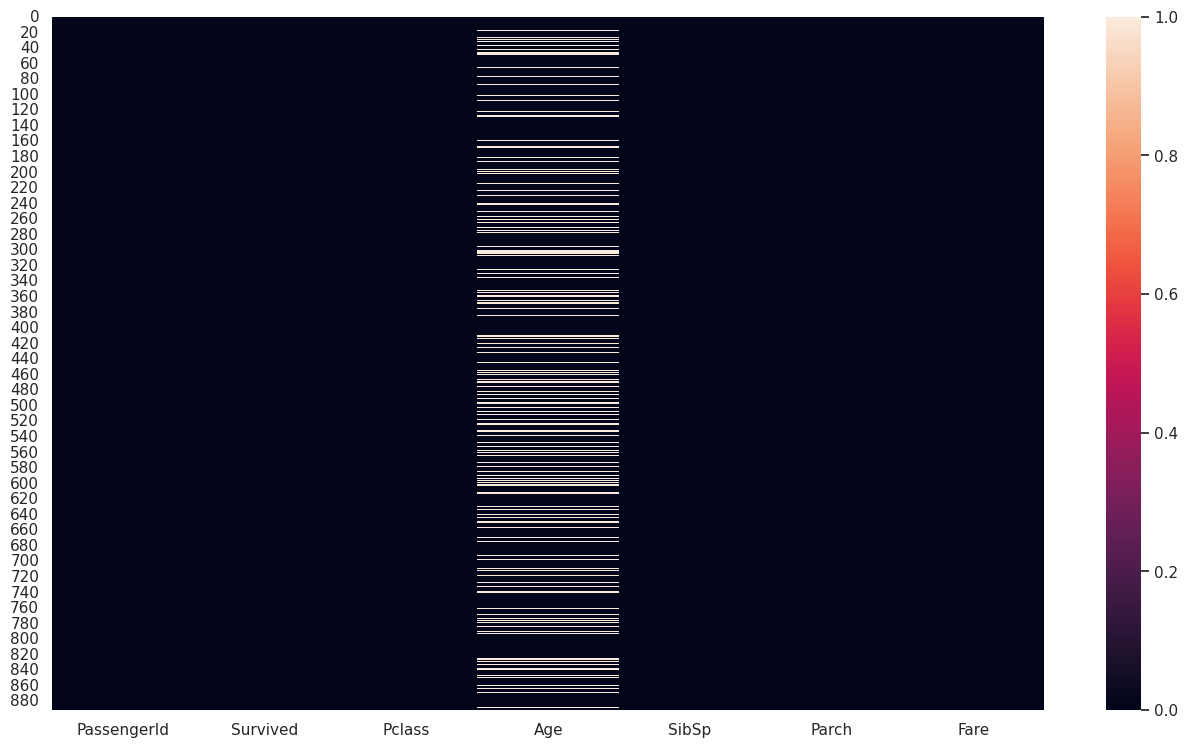

In [43]:
plt.figure(figsize=(16,9))
sns.heatmap(df3_num.isnull())

In [44]:
missing_num_var = [var for var in df3_num.columns if df3_num[var].isnull().sum()>0]

In [45]:
missing_num_var

['Age']

<ipython-input-46-ce76c93c9f43>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3_num[var],bins=20, kde_kws={'linewidth' :5, 'color' : '#DC143C'})


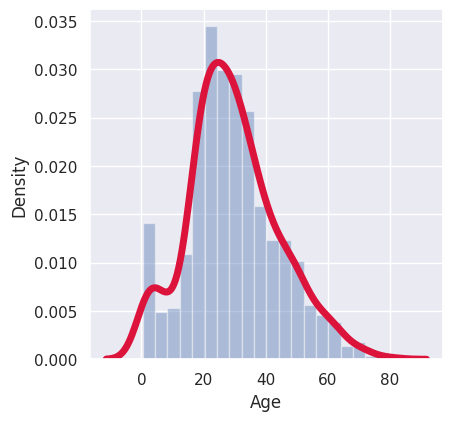

In [46]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(missing_num_var):
  plt.subplot(2,2,i+1)
  sns.distplot(df3_num[var],bins=20, kde_kws={'linewidth' :5, 'color' : '#DC143C'})



**Mean**

In [47]:
df4_num_mean = df3_num.fillna(df3_num.mean())

In [48]:
df4_num_mean.isnull().sum().sum()

0

**Median**

In [49]:
df5_num_median = df3_num.fillna(df3_num.median())

In [50]:
df5_num_median.isnull().sum().sum()

0

# **Row-wise**

In [51]:
df_concat = pd.concat([df3_num[missing_num_var],df4_num_mean[missing_num_var],df5_num_median[missing_num_var]])


In [53]:
df_concat[df_concat.isnull().any(axis=1)]

,Age
5,NaN
17,NaN
19,NaN
26,NaN
28,NaN
...,...
859,NaN
863,NaN
868,NaN
878,NaN
